In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_total = pd.read_csv('./curados/ULTIMATE_DATASET.csv')

In [3]:
data_total.dropna(inplace=True)

In [4]:
data_total.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data_total['tramite_tipo'].value_counts()

DENUNCIA DE ROBO O HURTO    59986
COMUNICACIÓN DE RECUPERO     2925
Name: tramite_tipo, dtype: int64

In [6]:
#cambio los valores de la columna tramite_tipo apra que robado sea 0 y recuperado 1
data_total['tramite_tipo'] = data_total['tramite_tipo'].map({'DENUNCIA DE ROBO O HURTO': 0, 'COMUNICACIÓN DE RECUPERO': 1})

In [7]:
data_total = data_total.rename(columns={'tramite_tipo':'recuperados'})

In [8]:
data_total.columns

Index(['recuperados', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dia_anio'],
      dtype='object')

In [9]:
data_total.drop(['registro_seccional_descripcion', 'titular_domicilio_localidad',], axis= 1, inplace = True)

In [10]:
data_total['tramite_fecha'] = pd.to_datetime(data_total['tramite_fecha'])
data_total['fecha_inscripcion_inicial'] = pd.to_datetime(data_total['fecha_inscripcion_inicial'])

In [11]:
data_total['dia_robo'] = data_total['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
data_total['mes_robo'] = data_total['tramite_fecha'].apply(lambda x: int(x.month))
data_total['dia_del_anio'] = data_total['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
data_total['anio_pat'] = data_total['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [12]:
data_total['tit_radicado'] = ((data_total['registro_seccional_provincia']).apply(lambda x: x.upper()) == data_total['titular_domicilio_provincia']).astype(int)

In [13]:
data_total.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [14]:
data_total.head(3)

,recuperados,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,dia_anio,dia_robo,mes_robo,dia_del_anio,anio_pat,tit_radicado
0,0,Buenos Aires,Nacional,2000.0,SEDAN 4 P,CHEVROLET,CORSA,Privado,Física,Masculino,1981.0,ARGENTINA,1,17,3,1,17,2000,1
1,0,Buenos Aires,Nacional,2007.0,FURGON,PEUGEOT,PARTNER,Privado,Física,Femenino,1990.0,ARGENTINA,1,3,3,1,3,2007,1
2,0,Buenos Aires,Nacional,1995.0,SEDAN 4 P,RENAULT,RENAULT 19,Privado,Física,Masculino,1986.0,ARGENTINA,1,12,5,1,12,1995,1


In [15]:
prov_dummie= pd.get_dummies(data_total.registro_seccional_provincia)
origen_dummie= pd.get_dummies(data_total.automotor_origen)
tipo_dummie= pd.get_dummies(data_total.automotor_tipo_descripcion)
marca_dummie= pd.get_dummies(data_total.automotor_marca_descripcion)
modelo_dummie= pd.get_dummies(data_total.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(data_total.automotor_uso_descripcion)
pais_tit_dummie = pd.get_dummies(data_total.titular_pais_nacimiento)
# MARCA NO LA NECESITAMOS, CON MODELO YA TENÉS MARCA

In [16]:
tipo_dummie = tipo_dummie.rename(columns={'PICK UP':'PICK UP tipo'})

In [17]:
marca_dummie = marca_dummie.rename(columns={'A.F.F.':'A.F.F. marca', 'PICK UP':'PICK UP marca', 'JEEP':'JEEP marca', 'RENAULT':'RENAULT marca'})


In [18]:
data_total['titular_pers_fisica'] = np.where(data_total['titular_tipo_persona'] == 'Física', 1, 0)

In [19]:
data_total['titular_masculino'] = np.where(data_total['titular_genero'] == 'Masculino', 1, 0)

In [20]:
data_total = data_total.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, pais_tit_dummie, marca_dummie]) #marca_dummie,

In [21]:
data_total.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [22]:
np.shape(data_total)

(62911, 2003)

In [23]:
x = data_total.drop('recuperados', axis = 1)
y = data_total.recuperados

In [24]:
data_total.recuperados.value_counts()

0    59986
1     2925
Name: recuperados, dtype: int64

In [25]:
np.where(np.isnan(x))

(array([], dtype=int64), array([], dtype=int64))

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print("La proporción de recuperados en el test es "+ str(ytest.sum()/np.shape(ytest)[0]))
print("La proporción de recuperados en el test es "+ str(ytrain.sum()/np.shape(ytrain)[0]))

La proporción de recuperados en el test es 0.046519020875278164
La proporción de recuperados en el test es 0.04648363875831687


Vemos que la proporción de recuperados es, aproximadamente, .05 en el train y el test set. Es decir, la estratificación funcionó bien.

## Undersampling con random

Lo primero que voy a hacer es probar randowm undersampling, es deir, borrar muestras de la majority al azar. Me quedo con N muestras, que en este caso lo puse como un tercio de los autos no recuperados.

In [27]:
# Mezclamos el dataset
shuffled_df = xtrain.sample(frac=1,random_state=4)

# Todos los recuperados por un lado
recup_df = xtrain.loc[ytrain == 1]
recup_df["recup"] = ytrain.loc[ytrain == 1]

# Los no recuperados por otro lado
no_recup_df = xtrain.loc[ytrain == 0]
no_recup_df["recup"] = ytrain.loc[ytrain == 0]

# Me quedo con N samples de los no recuperados
N = round(no_recup_df.shape[0]/3) # Me quedo con un tercio
no_recup_df = no_recup_df.sample(n=N,random_state=42)

In [28]:
undersampled_xtrain = pd.concat([recup_df, no_recup_df], ignore_index=True)
undersampled_ytrain = undersampled_xtrain["recup"]
undersampled_xtrain.drop('recup', axis=1, inplace=True)

## Oversampling con SMOTE

SMOTE me permite aumentar el número de muestras de la minoría hasta una cierta proporción de la mayoría (dada en el código por *prop*).

In [29]:
from imblearn.over_sampling import SMOTE

prop = .5 # Es decir, la minería va a ser prop veces la mayoría

# Resampleo la minoría
sm = SMOTE(sampling_strategy=prop, random_state=7)

# Fiteo el modelo para generar la nueva data sintética
oversampled_xtrain, oversampled_ytrain = sm.fit_sample(undersampled_xtrain, undersampled_ytrain)

Using TensorFlow backend.


In [30]:
print("La cantidad de muestras originales es " + str(undersampled_xtrain.shape[0]))
print("La cantidad de muestras aumentadas es " + str(oversampled_xtrain.shape[0]))

La cantidad de muestras originales es 16044
La cantidad de muestras aumentadas es 20995


In [31]:
print("La cantidad de recuperados originales es " + str(undersampled_ytrain.sum()))
print("La cantidad de recuperados aumentados es " + str(oversampled_ytrain.sum()))

La cantidad de recuperados originales es 2047
La cantidad de recuperados aumentados es 6998


In [34]:
print("La proporción de recuperados en la muestra aumentada es " + str(oversampled_ytrain.sum()/oversampled_xtrain.shape[0]))

La proporción de recuperados en la muestra aumentada es 0.3333174565372708


### Vamos a hacer un random forest con el SMOTE

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [36]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [20,50],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [40],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(oversampled_xtrain, oversampled_ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [37]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 30, max_depth=40, criterion='gini')
rfc1.fit(oversampled_xtrain, oversampled_ytrain)

In [39]:
ypred = CV_rfc.predict(xtest)

In [40]:
cm_rf = confusion_matrix(ytest, ypred)
print(cm_rf)

[[17759   237]
 [  437   441]]


### Fiteamos un KNN

In [132]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [135]:
iteraciones_knn = 10
# creo un vector de 50 posiciones para guardar los resultados de accuracy.
acc_knn = np.zeros(iteraciones_knn)

In [138]:
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain,ytrain)
    # calculo la prediccion
    ypred_knn = neigh.predict(xtest)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    acc_knn[r] = metrics.recall_score(ytest, ypred_knn)

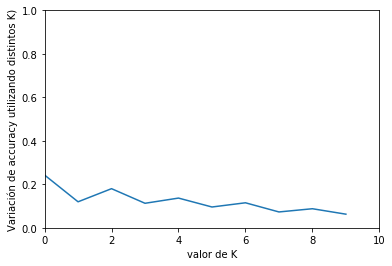

In [139]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
plt.ylim(0,1)
plt.xlim(0,10)
plt.show()